# Predicting IBM Employee Attrition Python Jupyter Notebook

## Part 2 - Build a Logistic Regression Model

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import churn modeling pickle file into a Pandas dataframe called churn_model2. **

In [3]:
churn_model2 = pd.read_pickle('../data/churn_modeling_data.pickle')

** Check number of rows and columns in churn_model2 dataframe. **

In [4]:
churn_model2.shape

(1470, 11)

** View structure of churn_model2 dataframe. **

In [5]:
churn_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
Churn                      1470 non-null int64
Age                        1470 non-null int64
DistanceFromHome           1470 non-null int64
EnvironmentSatisfaction    1470 non-null int64
JobInvolvement             1470 non-null int64
MonthlyIncome              1470 non-null int64
StockOptionLevel           1470 non-null int64
Sales_Rep                  1470 non-null uint8
Single                     1470 non-null uint8
BusTravLevel               1470 non-null int64
Overtime_Dum               1470 non-null int64
dtypes: int64(9), uint8(2)
memory usage: 106.3 KB


** View first five rows of churn_model2 dataframe. **

In [6]:
churn_model2.head()

,Churn,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,StockOptionLevel,Sales_Rep,Single,BusTravLevel,Overtime_Dum
0,1,41,1,1,2,5993,0,0,1,1,1
1,0,49,8,2,1,5130,1,0,0,2,0
2,1,37,2,3,1,2090,0,0,1,1,1
3,0,33,3,3,2,2909,0,0,0,2,1
4,0,27,2,0,2,3468,1,0,0,1,0


** Define X and y to split data into training and test sets, and construct logistic regression model. **

In [7]:
feature_cols = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome', 'StockOptionLevel', 
                'Sales_Rep', 'Single', 'BusTravLevel', 'Overtime_Dum']
X = churn_model2[feature_cols]
y = churn_model2['Churn']

** Decide which random state seed number will provide the highest area under the ROC curve (AUC). **

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
seed_range = range(100, 111)

auc_scores = []

for seed in seed_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred_prob).round(3))

Text(0,0.5,'Logistic Regression AUC Value')

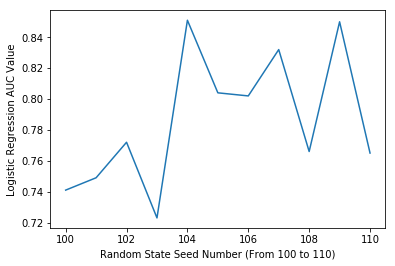

In [10]:
plt.plot(seed_range, auc_scores)
plt.xlabel('Random State Seed Number (From 100 to 110)')
plt.ylabel('Logistic Regression AUC Value')

In [11]:
print(auc_scores)

[0.741, 0.749, 0.772, 0.723, 0.851, 0.804, 0.802, 0.832, 0.766, 0.85, 0.765]


* 104 is the random state seed number that will produce the highest AUC value.

** Split churn / attrition modeling data into training and test sets. **

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104)

In [13]:
print(churn_model2.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 11)
(1102, 10)
(368, 10)


** Fit a logistic regression model on training data set. **

In [14]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

** Print logistic regression model intercept and coefficients. **

In [15]:
print(logreg.intercept_)
dict(zip(feature_cols, logreg.coef_[0]))

[-0.08850051]


{'Age': -0.02676574038740817,
 'BusTravLevel': 0.49656591735938865,
 'DistanceFromHome': 0.028296221595695645,
 'EnvironmentSatisfaction': -0.4047092795252152,
 'JobInvolvement': -0.47125558516582366,
 'MonthlyIncome': -8.846196845980196e-05,
 'Overtime_Dum': 1.5947093511308077,
 'Sales_Rep': 0.5166347639594551,
 'Single': 0.5363533460942848,
 'StockOptionLevel': -0.42030452903250154}

** Express logistic regression model coefficients as odds. **

In [16]:
dict(zip(feature_cols, np.exp(logreg.coef_[0])))

{'Age': 0.9735892874616218,
 'BusTravLevel': 1.6430691361084502,
 'DistanceFromHome': 1.0287003625559645,
 'EnvironmentSatisfaction': 0.6671707428622339,
 'JobInvolvement': 0.6242180171561099,
 'MonthlyIncome': 0.9999115419441847,
 'Overtime_Dum': 4.926896866991789,
 'Sales_Rep': 1.6763767432808505,
 'Single': 1.7097605750043792,
 'StockOptionLevel': 0.6568467604461994}

** Make predictions on test data set and calculate accuracy. **

In [17]:
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class).round(3))

0.87


** Compute null accuracy manually. **

In [18]:
print(1 - y_test.mean())

0.8396739130434783


** Calculate AUC value for logistic regression model. **

In [19]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(metrics.roc_auc_score(y_test, y_pred_prob).round(3))

0.851


** Plot logistic regression model ROC curve. **

Text(0,0.5,'True Positive Rate (Sensitivity)')

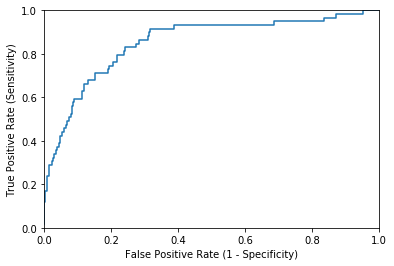

In [20]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

** Print confusion matrix to calculate accuracy and error rates plus precision and recall. **

In [21]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[301   8]
 [ 40  19]]


** Calculate accuracy rate. **

In [22]:
float(301 + 19) / float(301 + 8 + 40 + 19)

0.8695652173913043

** Calculate misclassification / error rate. **

In [23]:
float(40 + 8) / float(301 + 8 + 40 + 19)

0.13043478260869565

** Calculate precision to measure how confident the logistic regression model is for capturing the positives. **

In [24]:
float(19) / float(19 + 8)

0.7037037037037037

** Calculate recall / sensitivity to measure how well the logistic regression model is capturing the positives. **

In [25]:
float(19) / float(40 + 19)

0.3220338983050847

** Calculate specificity to measure how well the logistic regression model is capturing the negatives. **

In [26]:
float(301) / float(301 + 8)

0.9741100323624595

** List out false positives in test data set. **

In [27]:
X_test[y_test < y_pred_class]

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,StockOptionLevel,Sales_Rep,Single,BusTravLevel,Overtime_Dum
632,42,2,1,2,2515,0,0,1,2,1
1188,29,5,0,1,4187,1,0,0,1,1
55,33,1,0,2,13458,0,0,1,2,1
1102,36,2,2,2,2644,0,1,1,1,1
284,26,11,0,2,4741,1,0,0,2,1
909,19,25,1,3,2994,0,0,1,1,1
1168,24,2,0,2,3760,0,0,1,2,1
1436,21,5,2,2,2380,0,1,1,1,1


** List out false negatives in test data set. **

In [28]:
X_test[y_test > y_pred_class]

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,StockOptionLevel,Sales_Rep,Single,BusTravLevel,Overtime_Dum
1442,29,1,0,2,4787,3,0,0,1,1
645,29,1,1,1,2800,3,1,0,1,1
1246,30,8,2,1,2180,1,0,0,2,0
439,31,20,0,2,9824,0,0,0,2,0
293,26,4,3,1,5828,0,0,1,1,1
1333,46,10,2,2,7314,3,0,0,1,0
363,33,5,3,2,2851,0,1,1,1,1
573,26,8,3,1,5326,0,0,1,1,0
2,37,2,3,1,2090,0,0,1,1,1
480,30,12,1,1,2033,1,1,0,2,0


** Compute average logistic regression model accuracy score using 10-fold cross-validation. **

In [29]:
from sklearn.cross_validation import cross_val_score

C:\Users\kyrma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean().round(3))

0.858


** List out logistic regression model accuracy scores using 10-fold cross-validation. **

In [31]:
acc_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').round(3)
print(acc_scores)

[0.878 0.865 0.872 0.864 0.864 0.837 0.85  0.829 0.863 0.856]


** Compute average logistic regression model AUC value using 10-fold cross-validation. **

In [32]:
print(cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean().round(3))

0.792


** List out logistic regression model AUC values using 10-fold cross-validation. **

In [33]:
auc_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').round(3)
print(auc_scores)

[0.786 0.875 0.864 0.698 0.86  0.738 0.808 0.742 0.826 0.724]
